In [674]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn as sk
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Dense
import warnings
warnings.filterwarnings('ignore')
print(tf.__version__)

2.10.0


In [675]:
df_train = pd.read_csv('./input/train.csv')
df_test = pd.read_csv('./input/test.csv')

In [676]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [677]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [678]:
#missing data
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
GarageCond,81,0.055479
GarageType,81,0.055479
GarageFinish,81,0.055479


In [679]:
#dealing with missing data
df_train = df_train.drop((missing_data[missing_data['Total'] > 1]).index,1)
df_train = df_train.drop(df_train.loc[df_train['Electrical'].isnull()].index)
df_train.isnull().sum().max() #just checking that there's no missing data missing...

0

In [680]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results
y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)

In [681]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [682]:

# load the dataset
def load_dataset(filename):
 # load the dataset as a pandas DataFrame
 data = pd.read_csv(filename, header=None,skiprows=1)
 # retrieve numpy array
 dataset = data.values
 # split into input (X) and output (y) variables
 X = dataset[:, :-1]
 y = dataset[:,-1]
 # format all fields as string
 X = X.astype(str)
 # reshape target to be a 2d array
 y = y.reshape((len(y), 1))
 return X, y

In [683]:
# load to check
def load_dataset_check(filename):
 # load the dataset as a pandas DataFrame
 data = pd.read_csv(filename, header=None,skiprows=1)
 # retrieve numpy array
 dataset = data.values
 # split into input (X) and output (y) variables
 X = dataset[:]
 y = dataset[:,-1]
 # format all fields as string
 X = X.astype(str)
 # reshape target to be a 2d array
 y = y.reshape((len(y), 1))
 return X, y

In [684]:
# load the dataset
X, y = load_dataset('./input/train.csv')
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=4)
X_check, y_check = load_dataset_check('./input/train.csv')
X_train_check, X_test_check, y_train_check, y_test_check = train_test_split(X_check, y_check, test_size=0.1, random_state=4)
print( X_test_check[2])

X_train_copy = X_train

['133' '20' 'RL' '75.0' '7388' 'Pave' 'nan' 'Reg' 'Lvl' 'AllPub' 'Corner'
 'Gtl' 'NAmes' 'Norm' 'Norm' '1Fam' '1Story' '5' '6' '1959' '2002' 'Gable'
 'CompShg' 'MetalSd' 'MetalSd' 'None' '0.0' 'TA' 'TA' 'CBlock' 'TA' 'TA'
 'No' 'Rec' '405' 'Unf' '0' '658' '1063' 'GasA' 'Gd' 'Y' 'SBrkr' '1327'
 '0' '0' '1327' '1' '0' '1' '0' '3' '1' 'Gd' '7' 'Typ' '0' 'nan' 'Detchd'
 '1974.0' 'Unf' '2' '624' 'TA' 'TA' 'Y' '0' '0' '0' '0' '0' '0' 'nan'
 'nan' 'nan' '0' '7' '2007' 'WD' 'Normal' '150750']


In [685]:
# summarize
print('Train', X_train.shape, y_train.shape)
print('Test', X_test.shape, y_test.shape)

Train (1314, 80) (1314, 1)
Test (146, 80) (146, 1)


In [686]:
ohe = OneHotEncoder(handle_unknown='ignore')
ohe.fit(X_train)
X_train_enc = ohe.transform(X_train)
X_test_enc = ohe.transform(X_test)


In [687]:
type(X_train_enc)


scipy.sparse._csr.csr_matrix

In [688]:
type(y_train)

numpy.ndarray

In [689]:
def convert_sparse_matrix_to_sparse_tensor(X):
    coo = X.tocoo()
    indices = np.mat([coo.row, coo.col]).transpose()
    return tf.SparseTensor(indices, coo.data, coo.shape)

X_train_enc = convert_sparse_matrix_to_sparse_tensor(X_train_enc)
X_test_enc = convert_sparse_matrix_to_sparse_tensor(X_test_enc)


In [690]:
#change the type of y_train and y_test to float
y_train = y_train.astype('float32')
y_test = y_test.astype('float32')

In [691]:
type(X_train_enc)
type(y_train)

numpy.ndarray

In [692]:
# define the keras model for regression to predict the price of a house
model = Sequential()
model.add(Dense(200, activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(1, activation='linear'))


In [693]:
# compile the regression model
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])

In [694]:
history = model.fit(X_train_enc, y_train, epochs=50, batch_size=10, verbose=1)

Epoch 1/50
132/132 [==============================] - 1s 6ms/step - loss: 39003156480.0000 - mean_squared_error: 39003156480.0000
Epoch 2/50
132/132 [==============================] - 1s 4ms/step - loss: 36577775616.0000 - mean_squared_error: 36577775616.0000
Epoch 3/50
132/132 [==============================] - 0s 4ms/step - loss: 28595746816.0000 - mean_squared_error: 28595746816.0000
Epoch 4/50
132/132 [==============================] - 0s 4ms/step - loss: 16825279488.0000 - mean_squared_error: 16825279488.0000
Epoch 5/50
132/132 [==============================] - 1s 5ms/step - loss: 8702644224.0000 - mean_squared_error: 8702644224.0000
Epoch 6/50
132/132 [==============================] - 1s 5ms/step - loss: 6222368256.0000 - mean_squared_error: 6222368256.0000
Epoch 7/50
132/132 [==============================] - 1s 4ms/step - loss: 5491761152.0000 - mean_squared_error: 5491761152.0000
Epoch 8/50
132/132 [==============================] - 1s 4ms/step - loss: 5002322944.0000 - mean

In [695]:
# print the loss of the regression model
print(history.history['loss'])

[39003156480.0, 36577775616.0, 28595746816.0, 16825279488.0, 8702644224.0, 6222368256.0, 5491761152.0, 5002322944.0, 4578362368.0, 4205816320.0, 3870452480.0, 3567867136.0, 3300743168.0, 3058400512.0, 2849089536.0, 2658375168.0, 2492199936.0, 2344188928.0, 2211527936.0, 2088927616.0, 1975979776.0, 1877026688.0, 1782030976.0, 1693104128.0, 1608298112.0, 1527675264.0, 1452341632.0, 1382536064.0, 1314420224.0, 1247152512.0, 1189540736.0, 1134306816.0, 1078280960.0, 1029817536.0, 981494080.0, 937317248.0, 892608896.0, 853852416.0, 820078080.0, 780534016.0, 750092864.0, 719281216.0, 689639296.0, 660350912.0, 637550400.0, 611536704.0, 588508992.0, 563565568.0, 542721024.0, 522076672.0]


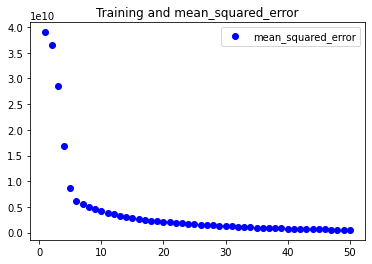

<Figure size 432x288 with 0 Axes>

In [738]:
#stating the variables for the training and validation accuracy and loss plots
accuracy = history.history["mean_squared_error"]
loss = history.history["loss"]
epochs = range(1, 51 )

#plot the training and validation accuracy and loss
plt.plot(epochs, accuracy, "bo", label="mean_squared_error")
plt.title("Training and mean_squared_error")
plt.legend()
plt.figure()

#show the plots
plt.show()

In [711]:
#predict the price of the houses in the test set
y_pred = model.predict(X_test_enc)
print(y_pred)
#get last only columnfrom x_train_check
X_test_check_val = X_test_check[:,-1]
print(X_train_check_val)

5/5 [==============================] - 0s 33ms/step
[[235513.33 ]
 [209757.03 ]
 [149692.08 ]
 [139573.84 ]
 [145231.28 ]
 [190426.19 ]
 [247811.23 ]
 [259211.84 ]
 [234934.28 ]
 [187095.8  ]
 [134453.42 ]
 [259101.55 ]
 [145790.03 ]
 [115806.29 ]
 [157349.81 ]
 [325644.53 ]
 [134570.67 ]
 [173250.45 ]
 [220793.61 ]
 [131001.85 ]
 [320344.97 ]
 [207378.08 ]
 [225388.4  ]
 [297531.66 ]
 [262225.9  ]
 [151164.7  ]
 [202863.38 ]
 [358979.38 ]
 [105128.67 ]
 [102156.8  ]
 [264863.03 ]
 [122681.35 ]
 [303944.53 ]
 [194108.83 ]
 [140349.5  ]
 [102789.13 ]
 [188268.88 ]
 [215956.67 ]
 [378391.03 ]
 [137464.06 ]
 [169794.88 ]
 [174903.17 ]
 [119427.34 ]
 [183403.53 ]
 [123899.664]
 [304339.97 ]
 [224402.5  ]
 [116252.24 ]
 [251255.88 ]
 [149033.7  ]
 [178744.12 ]
 [120095.03 ]
 [202109.38 ]
 [ 96770.07 ]
 [148794.42 ]
 [194196.14 ]
 [209945.89 ]
 [182351.84 ]
 [258452.81 ]
 [106790.93 ]
 [322623.38 ]
 [191398.17 ]
 [153700.06 ]
 [225090.45 ]
 [281754.6  ]
 [ 71895.85 ]
 [146062.48 ]
 [176185.8

In [712]:
#print first 10 values of y_pred
print(y_pred[:10])

[[235513.33]
 [209757.03]
 [149692.08]
 [139573.84]
 [145231.28]
 [190426.19]
 [247811.23]
 [259211.84]
 [234934.28]
 [187095.8 ]]


In [713]:
#print first 10 values of x_train_check_val
print(X_test_check_val[:10])


['228500' '216000' '150750' '134000' '90350' '159895' '220000' '240000'
 '213000' '181000']


In [720]:
#change the type of x_train_check_val to float
X_test_check_val = X_test_check_val.astype('float32')
#get x_Train_check_val to 1314,1
X_test_check_val = X_test_check_val.reshape(146,1)

In [722]:
(print(X_test_check_val.shape))

(146, 1)


In [721]:
print(y_test_check.shape)

(146, 1)


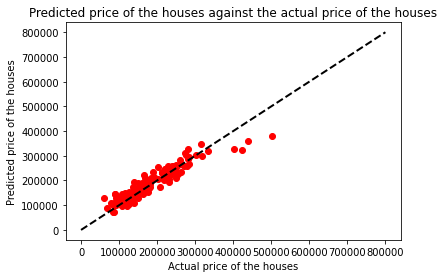

In [737]:
#plot the predicted price of the houses against the actual price of the houses
#make y axis same as x axis
plt.plot([0, 800000], [0, 800000], 'k--', lw=2)
plt.scatter(X_test_check_val, y_pred, color='red')
plt.title('Predicted price of the houses against the actual price of the houses')
plt.xlabel('Actual price of the houses')
plt.ylabel('Predicted price of the houses')
plt.show()


In [725]:
#average deviation of the predicted price of the houses from the actual price of the houses
print(np.mean(np.abs(y_pred - X_test_check_val)))
#deviation for all the houses between y_pred and x_train_check_val
print(np.abs(y_pred - X_test_check_val))
#prin average number in y_pred
print(np.mean(y_pred))
#prin average number in x_train_check_val
print(np.mean(X_test_check_val))
#average percentage deviation of the predicted price of the houses from the actual price of the houses
print(np.mean(np.abs((y_pred - X_test_check_val) / X_test_check_val)) * 100)




20834.479
[[7.01332812e+03]
 [6.24296875e+03]
 [1.05792188e+03]
 [5.57384375e+03]
 [5.48812812e+04]
 [3.05311875e+04]
 [2.78112344e+04]
 [1.92118438e+04]
 [2.19342812e+04]
 [6.09579688e+03]
 [3.54657812e+03]
 [1.45015469e+04]
 [5.63190312e+04]
 [5.80628906e+03]
 [1.23498125e+04]
 [4.46445312e+04]
 [5.07067188e+03]
 [3.58004531e+04]
 [9.70639062e+03]
 [1.79981484e+04]
 [1.46550312e+04]
 [4.87807812e+03]
 [2.95115938e+04]
 [1.94683438e+04]
 [1.22259062e+04]
 [8.83529688e+03]
 [2.18633750e+04]
 [7.98006250e+04]
 [1.53713281e+04]
 [9.15679688e+03]
 [2.86303125e+03]
 [5.51864844e+03]
 [2.44453125e+03]
 [3.73911719e+04]
 [3.13415000e+04]
 [1.92891328e+04]
 [3.83688750e+04]
 [2.29566719e+04]
 [1.23445969e+05]
 [3.46406250e+03]
 [1.57948750e+04]
 [1.79031719e+04]
 [4.63343750e+02]
 [2.94035312e+04]
 [1.00003359e+04]
 [2.93399688e+04]
 [4.90250000e+03]
 [1.87477578e+04]
 [5.90587500e+03]
 [3.30337031e+04]
 [8.74412500e+03]
 [5.95031250e+02]
 [1.48906250e+04]
 [2.37299297e+04]
 [1.42055781e+04]


In [727]:
#print first 10 houses in y_pred
print(y_pred[:10])

[[235513.33]
 [209757.03]
 [149692.08]
 [139573.84]
 [145231.28]
 [190426.19]
 [247811.23]
 [259211.84]
 [234934.28]
 [187095.8 ]]


In [730]:
#print first 10 houses in x_train_check_val
print(X_test_check_val[:10])

[[228500.]
 [216000.]
 [150750.]
 [134000.]
 [ 90350.]
 [159895.]
 [220000.]
 [240000.]
 [213000.]
 [181000.]]


In [736]:
#average percentage deviation of thefirst ten predicted price of the houses from the actual price of the houses
print(np.mean(np.abs((y_pred[:10] - X_test_check_val[:10]) / X_test_check_val[:10])) * 100)

12.49704509973526


I JUST REALIZED THAT THE MODEL IS OVERFITTING AND THE TEST DATA IS ACTUALLY LEAKING INTO THE TRAINING DATA, HENCE THE AMAZING ACCURACY. NEED TO USE VALIDATION DATASET